TD 4 - Data analysis
----------------------------

In this notebook, we manipulate some basic statistical notions using python libraries.

In [11]:
import pandas              # deal with dataframes -> powerful database-like functions + stats
import numpy as np         # numerical functions (e.g. generate random samples according to a distribution)
import scipy, scipy.stats  # statistics, notably correlation
from matplotlib import pyplot as plt   # Make graphics (histograms) easily
%matplotlib inline

## Compositionality

The compositionality dataset below comes from the experiments in compositionaliyty prediction described in [this paper](https://aclanthology.org/J19-1001/). We will focus on the column called _compositionality_  which contains average annotations on a scale from 0 to 5 by about 15-20 human judges per compound noun, on a set of 180 compound nouns in French. The details of the construction of this dataset can be found [here](https://aclanthology.org/P16-2026/). The dataset contains also many other columns that we may explore later, including automatic compositionality predictions.

### 1. Reading the data

We will read the full dataset from a tab-separated table file using Pandas, a very useful python library for data analysis.

In [2]:
results_df=pandas.read_csv('superjoined.norm.csv', sep='\t')
lemma_comp = results_df[['compound_lemma','compositionality']]
lemma_comp[0:5]

compound_lemma  compositionality
0  activité_physique            4.9333
1     année_scolaire            3.6000
2   art_contemporain            4.6000
3         baie_vitré            3.6364
4           bas_côté            1.3077

**Exercises**

1. Use pandas' `.sort_values()` function and python slices to obtain the 10 most and least compositional compounds in the dataset.

In [ ]:
# Up to you!

### 2. Histogram

We will now focus on the _compositionality_ column. A histogram can help us have an idea of the distribution of values.

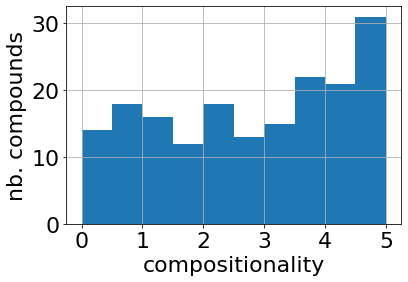

In [3]:
plt.rcParams.update({'font.size': 22}) # Increase graphic font size 
comp = results_df['compositionality']
comp.hist(bins=10) # you can play with bin size to see what happens (default=10)
plt.xlabel("compositionality") # It's a good idea to always label your graphics' axes
plt.ylabel("nb. compounds")
plt.xticks(np.arange(6))       # Add a tick for every value between 0 and 5
plt.show()

**Exercises**
  
1. Does this look like a known probability distribution (uniform, normal...)?
2. Add the parameter `density=True` and see what happens with the histogram. Is this an (estimated) probability distribution? Why?
3. Play with the bin size and observe: what happens with the histogram?

In [ ]:
# Up to you!

### 3. Mean, standard deviation

We will start by looking at some basic statistical descriptors of the `compositionality` column.


In [4]:
comp.describe()

count    180.000000
mean       2.770321
std        1.505560
min        0.000000
25%        1.383325
50%        2.900000
75%        4.129475
max        5.000000
Name: compositionality, dtype: float64

**Exercises**

1. Is the `std` value obtained the population (divided by $n$) or sample (divided by $n-1$) standard deviation? Calculate the standard deviation using your own implementation of the formula, and then compare.


In [ ]:
# Up to you!

### 4. Central limit theorem

We would like to test empirically whether the central limit theorem is verified on this data. We randomly subsample $n$ times a subset of $k$ compounds, calculate the average, and then check its distribution with a histogram. Notice that the underlying distribution of the `compositionality` variable does **not** look like a normal distribution (histogram above)!

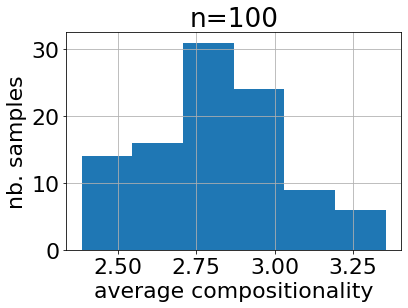

In [5]:
n = 100 # number of resamples, change and see what happens
k = 30 # sample size, change and see what happens
avg = []
for i in range(n):
    subsample = comp.sample(k)
    avg.append(subsample.mean())
avgDF = pandas.DataFrame(avg)
avgDF.hist(bins=min(int(n/15),50))
plt.title("n="+str(n)) # Add a title to the graphic
plt.xlabel("average compositionality")
plt.ylabel("nb. samples")
plt.show()

**Exercises**

1. Change the values of $n$ (number of random samples) to see how the number of samples influences the shape of the histogram.
1. Change the values of $k$ (size of random samples) to see how the size of samples influences the shape of the histogram.

In [ ]:
# Up to you!

### 5. Normal distribution standardisation

Let us now standardise the average `compositionality` values sampled above so that they are centered around zero and have unit standard deviation. Notice that the

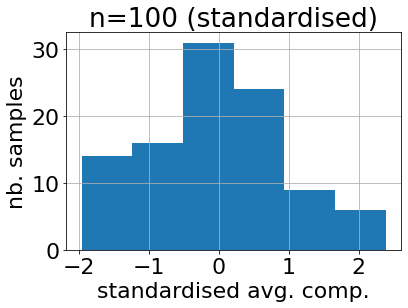

In [6]:
std_avgDF = (avgDF - avgDF.mean()) / avgDF.std()
std_avgDF.hist(bins=min(int(n/15),50))
plt.title("n="+str(n)+" (standardised)")
plt.xlabel("standardised avg. comp.")
plt.ylabel("nb. samples")
plt.show()

### 6. Compositionality and number of occurrences

We would like to study the relationship between `compositionality` and compound frequency (number of occurrences in a large textual corpus), called `freq.w1&w2` in our dataset. Let us extract these two variables from the dataset.

In [7]:
compfreq = results_df[['compositionality','freq.w1&w2']]
compfreq[0:5]

compositionality  freq.w1&w2
0            4.9333       13292
1            3.6000       19681
2            4.6000       14437
3            3.6364         540
4            1.3077        1259

### 7. Scatter plot

Let's start by visually inspecting the relation between the two quantities with a scatter plot.

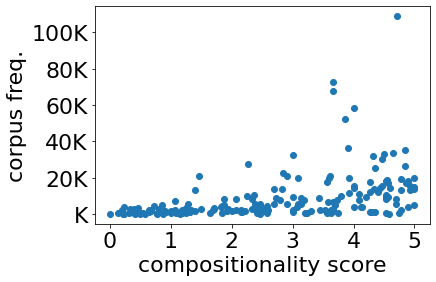

In [8]:
plt.scatter(compfreq['compositionality'],compfreq['freq.w1&w2'])
plt.xlabel("compositionality score")
plt.ylabel("corpus freq.")
plt.yticks(np.arange(0,120000,20000),map(lambda x:str(x)[:-3]+"K",np.arange(0,120000,20000))) # Fancy ticks using "K" instead of "000"
plt.xticks(np.arange(6))
plt.show()

We can see that maybe some relation exists, but it is not so straightforward to visualise it. This may be because the number of occurrences does not increase linearly (its distribution is [Zipfian](https://en.wikipedia.org/wiki/Zipf%27s_law)), and is easier to analyse in log domain.

**Exercises**

1. Remove the outliers, that is, compounds that are "too" frequent (above a certain threshold). Is it easier to visualise the relation between both variables now?
2. Build a scatter plot to compare compositionality with the **logarithm** of the number of occurrences (instead of the raw number of occurrences). Is it easier to visualise the relation between both variables now?


### 8. Pearson (linear) correlation

Now let us check the covariance and correlation between the `compositionality` vs. `frequency` of the compounds sample:

In [9]:
scipy.stats.pearsonr(compfreq['compositionality'],compfreq['freq.w1&w2'])

PearsonRResult(statistic=0.4300049458541972, pvalue=1.6988537167499739e-09)

**Exercises**

1. Calculate the **Pearson correlation** between compositionality and the logarithm of frequency. What happens?
2. Calculate the **covariance** (`np.cov()`) between compositionality and frequency. Then between compositionality and the logarithm of frequency. What happens?

In [ ]:
# Up to you!

### 9. Spearman correlation

_Adapted from https://medium.com/analytics-vidhya/spearmans-correlation-f34c094d99d8_

We will study Spearman's rank correlation on a toy example consisting of grades in English and Maths courses. We will first calculate the correlation using the formula, and then verify it (a) via Pearson correlation of ranks and (b) via scipy's Spearman implementation.

In [29]:
english = np.array([67,89,88,90,95])
maths = np.array([77,86,98,95,87])
d = {'english':english, 'maths':maths}
data = pandas.DataFrame(d)
data

english  maths
0       67     77
1       89     86
2       88     98
3       90     95
4       95     87

In [34]:
data=data.sort_values("english")
data["rank_english"]=np.arange(len(data))+1
data=data.sort_values("maths")
data["rank_maths"]=np.arange(len(data))+1
data["d2"]=(data["rank_english"]-data["rank_maths"])**2
data

english  maths  rank_english  rank_maths  d2
0       67     77             1           1   0
1       89     86             3           2   1
4       95     87             5           3   4
3       90     95             4           4   0
2       88     98             2           5   9

In [45]:
n=len(data)
rho=1-((6*data["d2"].sum())/(n*(n**2-1)))
print(rho,
      scipy.stats.pearsonr(data["rank_english"],data["rank_maths"])[0],
      scipy.stats.spearmanr(data["english"],data["maths"])[0])

0.30000000000000004 0.3 0.3


**Exercises**

1. Do the same calculations for compositionality and frequency. Do you observe the same, that is, that all three ways of computing Spearman correlation yield the same value?

In [ ]:
# Up to you!

### 10. Pearson vs. Spearman correlations

Pearson's correlation coefficient can only measure linear correlation. Spearman correlation, on the other hand, measures monotonic correlation, as exemplified below.

Pearson's r = 0.91, Spearman's rho = 1.00


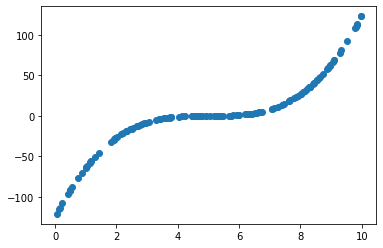

In [46]:
x = np.random.uniform(0,10,150)
exp = 3 # Change this value for higher odd values (5, 7, 9...) What happens?
power = (x-5)**exp
r = scipy.stats.pearsonr(x,power)
rho = scipy.stats.spearmanr(x,power)
print("Pearson's r = {:.2f}, Spearman's rho = {:.2f}".format(r[0],rho[0]))
plt.scatter(x,power)
plt.show()

**Exercises**

Now let us check the different between the two correlation scores, Pearson and Spearman, for the **compositionality** vs. **frequency** data:
1. Play with the `exp` variable above to change the form of the curve. What happens to Pearson and Spearman correlations?
2. Calculate the Pearson and Spearman correlation between both variables using `scipy`
3. Calculate the Pearson and Spearman correlation compositionality and the _logarithm_ of frequency using `scipy`. What changes? Why?

In [ ]:
# Up to you!